Questions:
1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?

Dateset1:


In [17]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

In [54]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [38]:
import requests

In [39]:

from io import StringIO

In [40]:
sourse = requests.get(url).text

In [41]:
poll_data = StringIO(sourse)

In [42]:
poll_data

In [43]:
poll_df = pd.read_csv(poll_data)

In [44]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


C:\Users\woowoo\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


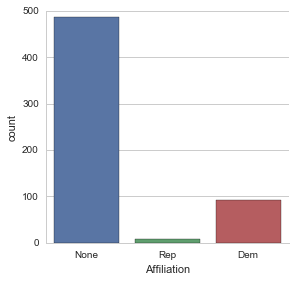

In [45]:
sns.factorplot('Affiliation',data=poll_df,kind="count")

C:\Users\woowoo\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


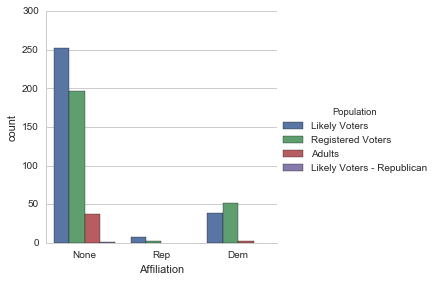

In [46]:
sns.factorplot('Affiliation',data=poll_df,hue="Population",kind="count")

In [57]:
avg = pd.DataFrame(poll_df.mean())

In [58]:
std = pd.DataFrame(poll_df.std())

In [63]:
avg.drop('Number of Observations',axis=0,inplace=True)

In [64]:
avg

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [65]:
std.drop('Number of Observations',axis=0,inplace=True)

In [66]:
std

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


In [68]:
poll_stat = pd.concat([avg,std],axis=1)

In [69]:
poll_stat

,0,0
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [70]:
poll_stat.columns = ['Average','STD']

In [71]:
poll_stat.head()

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


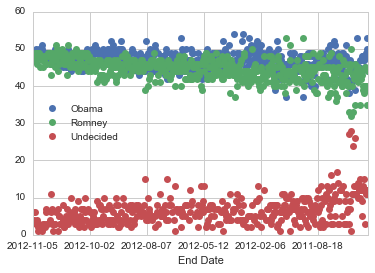

In [75]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

In [77]:
poll_df['difference'] = (poll_df.Obama - poll_df.Romney)/100

In [79]:
poll_df=poll_df.groupby(['Start Date']).mean()

In [80]:
poll_df.head()

,Number of Observations,Obama,Romney,Undecided,difference
Start Date,,,,,
2009-03-13,1403,44,44,12,0.00
2009-04-17,686,50,39,11,0.11
2009-05-14,1000,53,35,12,0.18
2009-06-12,638,48,40,12,0.08
2009-07-15,577,49,40,11,0.09
